[*********************100%***********************]  1 of 1 completed


TypeError: only length-1 arrays can be converted to Python scalars

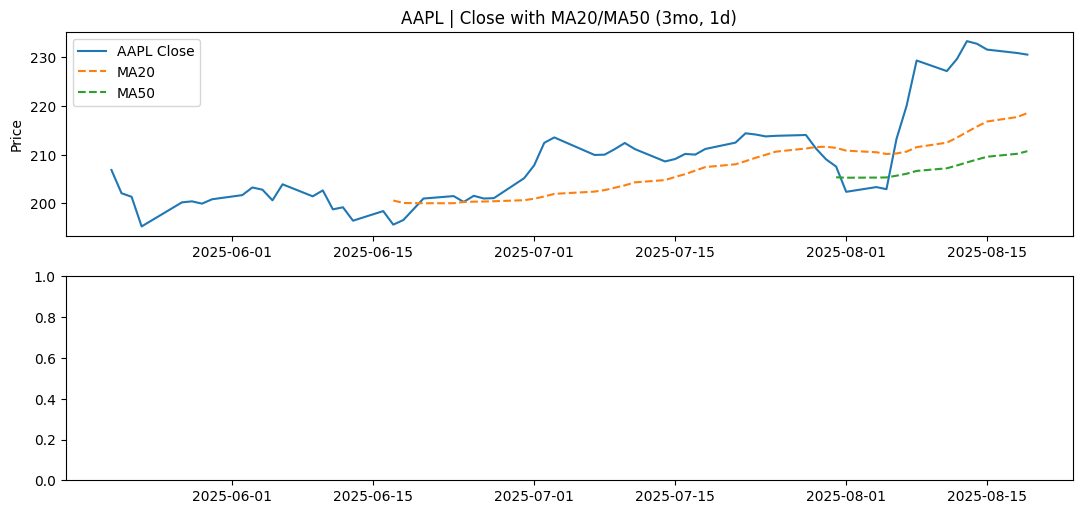

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# === 參數（可修改）===
TICKER = "AAPL" # 例：AAPL / TSLA / MSFT / 0700.HK / 005930.KS
PERIOD = "3mo" # 例："1mo","3mo","6mo","1y","2y"
INTERVAL = "1d" # 例："1d","1h","30m","5m"

# 下載資料
data = yf.download(TICKER, period=PERIOD, interval=INTERVAL, auto_adjust=False)

# 技術指標：MA20 / MA50
data["MA20"] = data["Close"].rolling(20).mean()
data["MA50"] = data["Close"].rolling(50).mean()

# RSI(14)
delta = data["Close"].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = (-delta.clip(upper=0)).rolling(14).mean()
rs = gain / loss
data["RSI"] = 100 - (100 / (1 + rs))

# --- 畫圖：股價+均線 + 成交量 + RSI ---
fig = plt.figure(figsize=(13,9))

# (1) 股價 + 均線
ax1 = plt.subplot(3,1,1)
ax1.plot(data.index, data["Close"], label=f"{TICKER} Close")
ax1.plot(data.index, data["MA20"], label="MA20", linestyle="--")
ax1.plot(data.index, data["MA50"], label="MA50", linestyle="--")
ax1.set_title(f"{TICKER} | Close with MA20/MA50 ({PERIOD}, {INTERVAL})")
ax1.set_ylabel("Price")
ax1.legend(loc="upper left")

# (2) 成交量（柱狀）
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.bar(data.index, data["Volume"], label="Volume")
ax2.set_ylabel("Volume")
ax2.legend(loc="upper left")

# (3) RSI
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(data.index, data["RSI"], label="RSI(14)")
ax3.axhline(70, linestyle="--") # 超買
ax3.axhline(30, linestyle="--") # 超賣
ax3.set_ylabel("RSI")
ax3.set_xlabel("Date")
ax3.legend(loc="upper left")

plt.tight_layout()
plt.show()